花哨的索引和前面那些简单的索引非常类似，但是传递的是索引数组，而不是单个标量。花哨的索引让我们能够快速获得并修改复杂的数组值的子数据集。

# 1-探索花哨的索引

In [1]:
# 意味着传递一个索引数组来一次性获得多个数组元素
import numpy as np
rand = np.random.RandomState(42)

x = rand.randint(100, size=10)
x

array([51, 92, 14, 71, 60, 20, 82, 86, 74, 74])

In [2]:
# 获得三个不同的元素，可以用以下方式实现
[x[3], x[7], x[2]]

[71, 86, 14]

In [3]:
# 另外一种方法是通过传递索引的单个列表或数组来获得同样的结果
ind = [3,7,4]
x[ind]

array([71, 86, 60])

In [4]:
# 利用花哨的索引，结果的形状与索引数组的形状一致，而不是与被索引数组的形状一致
ind = np.array([[3,7],[4,5]])
x[ind]

array([[71, 86],
       [60, 20]])

In [5]:
# 花哨的索引也对多个维度适用
X = np.arange(12).reshape((3,4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [6]:
# 和标准的索引方式一样，第一个索引指的是行，第二个索引指的是列
row = np.array([0,1,2])
col = np.array([2,1,3])
X[row,col]

array([ 2,  5, 11])

结果的第一个值是 X[0, 2]

在花哨的索引中，索引值的配对遵循 2.5 节介绍过的广播的规则。

In [7]:
# 将一个列向量和一个行向量组合在一个索引中时，会得到一个二维的结果
X[row[:, np.newaxis], col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

In [8]:
# 每一行的值都与每一列的向量配对，正如我们看到的广播的算术运算
row[:, np.newaxis] * col

array([[0, 0, 0],
       [2, 1, 3],
       [4, 2, 6]])

注意：花哨的索引返回的值反映的是广播后的索引数 组的形状，而不是被索引的数组的形状

# 2-组合索引

In [9]:
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [10]:
# 将花哨的索引和简单的索引组合使用
X[2, [2,0,1]]

array([10,  8,  9])

In [11]:
# 将花哨的索引和切片组合使用
X[1:,[2,0,1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

In [12]:
# 将花哨的索引和掩码组合使用
mask = np.array([1,0,1,0], dtype=bool)
X[row[:, np.newaxis], mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

索引选项的组合可以实现非常灵活的获取和修改数组元素的操作

# 3-示例：选择随机点
    常见用途是从一个矩阵中选择行的子集

In [13]:
# 有一个 N×D 的矩阵，表示在 D 个维度的 N 个点
# 以下是一个二维正态分布的点组成的数组
mean = [0,0]
cov = [[1,2],
       [2,5]]
X = rand.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

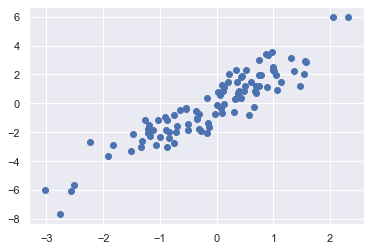

In [14]:
# 可以用散点图将这些点可视化
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # 设置绘图风格
plt.scatter(X[:, 0], X[:, 1]);

利用花哨的索引随机选取 20 个点----选择 20 个随机的、不重复的索引值，并利用这些索引值选取到原始数组对应的值

In [15]:
indices = np.random.choice(X.shape[0], 20, replace=False)
indices

array([63, 67, 40, 62, 31, 47,  7, 90, 48, 94,  5, 87,  1, 55, 74,  8, 11,
        3, 93, 65])

In [16]:
selection = X[indices]
selection.shape

(20, 2)

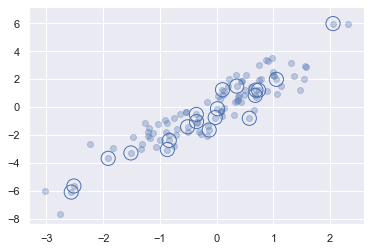

In [17]:
# 将选中的点在图上用大圆圈标示出来
plt.scatter(X[:, 0], X[:, 1], alpha=0.3) 
plt.scatter(selection[:, 0], selection[:, 1], facecolor='none', edgecolor='b', s=200);

# 4-用花哨的索引修改值

In [18]:
# 有一个索引数组，病希望设置数组中对应的值
x = np.arange(10)
i = np.array([2,1,8,4])
x[i] = 99
print(x)

[ 0 99 99  3 99  5  6  7 99  9]


In [19]:
# 可以用任何的赋值操作来实现
x[i] -= 10
x

array([ 0, 89, 89,  3, 89,  5,  6,  7, 89,  9])

In [20]:
# 操作中重复的索引会导致一些出乎意料的结果产生
x = np.zeros(10)
x[[0,0]] = [4,6]
x

array([6., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

首先赋值 x[0] = 4，然后赋值 x[0] = 6

In [21]:
# 设想以下操作
i = [2,3,3,4,4,4]
x[i] += 1
x

array([6., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

可能期望 x[3] 的值为 2，x[4] 的值为 3，因为这是这些索引值重复的次数。

但为什么结果不同于预想呢？概念的角度，这是因为 x[i] += 1 是 x[i] = x[i] + 1 的简写。

x[i] + 1 计算后，这个结果被赋值给了 x 相应的索引值。

数组并没有发生多次累加，而是发生了赋值，显然这不是我们希望的结果。

In [22]:
# 如果你希望累加，借助通用函数中的 at() 函数来实现
x = np.zeros(10)
np.add.at(x, i, 1)
x

array([0., 0., 1., 2., 3., 0., 0., 0., 0., 0.])

at() 函数在这里对给定的操作、给定的索引（这里是 i）以及给定的 值（这里是 1）执行的是就地操作

另一个可以实现该功能的类似方法是通用函数中的 reduceat() 函数

# 5-示例：数据区间划分

In [23]:
# 有 1000 个值，希望快速统计分布在每个区间中的数据频次，可以用 ufunc.at 来计算
np.random.seed(42)
x = np.random.randn(100)

# 手动的计算直方图
bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)

# 为每个 x 找到合适的区间
i = np.searchsorted(bins, x)

# 为每个区间加上 1
np.add.at(counts, i, 1)

计数数组 counts 反映的是在每个区间中的点的个数

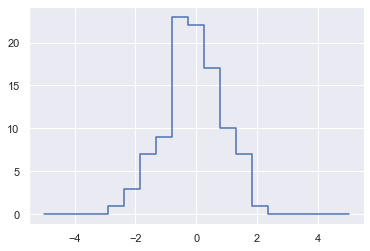

In [24]:
# 画出结果
plt.plot(bins, counts, drawstyle='steps');

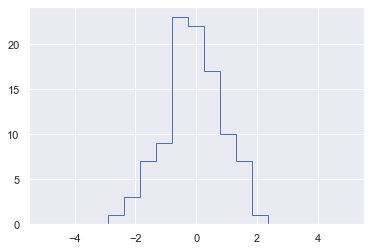

In [25]:
# 如果每次需要画直方图你都这么做的话，也是很不明智的。
# 这就是为什么 Matplotlib 提供了 plt.hist() 方法
plt.hist(x, bins, histtype='step');

为了计算区间，Matplotlib 将使用 np.histogram 函数，该函数的计算功能也和上面执行的计算类似。

In [26]:
# 两种方法比较
print("NumPy routine:")
%timeit counts, edges = np.histogram(x, bins)
print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy routine:
21.4 µs ± 931 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Custom routine:
13.1 µs ± 51.7 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


我们一行代码的算法比 NumPy 优化过的算法快好几倍！

这是如何做到的呢？ 如果深入 np.histogram 源代码（输入np.histogram?? 查看源代码），就会看到它比我们前面用过的简单的搜索和计数方法更复杂。

这是由于 NumPy 的算法更灵活（需要适应不同场景），因此在数据点比较大时更能显示出其良好性能

In [27]:
x = np.random.randn(1000000)
print("NumPy routine:")
%timeit counts, edges = np.histogram(x, bins)
print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy routine:
60 ms ± 366 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Custom routine:
106 ms ± 1.85 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
